In [2]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import os

# function to easily plot scatter plots with linear regression. 

def plt_scat(x_vals, y_vals, xlabel, ylabel, title):
    fig, ax = plt.subplots(1,1,figsize=(7,5))

    slope, intercept, r_val, p_val, std_err = stats.linregress(x_vals, y_vals)
    corr = stats.pearsonr(x_vals, y_vals)[0]
    
    y_fit = slope * x_vals + intercept
    y_fit_label = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    ax.scatter(x=x_vals, y=y_vals, s=30, edgecolors='black', alpha=1)
    ax.plot(x_vals, y_fit, linestyle="--", color = 'red', alpha = 0.5, label =y_fit_label)
    
    ax.set_xlim(min(x_vals)-2, max(x_vals)+2)
    ax.set_ylim(min(y_vals)-2, max(y_vals)+2)
    
    ax.legend(loc='best', fontsize = 12)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(f"{title}")

    ax.grid(alpha = 0.5)

    print(f"The r-value is: {corr}")

    plt.show()

In [4]:
# IMPORT combined FILE

filepath = os.path.join("Output_Data", "combined_data_2014_2015.csv")

combined_data_df = pd.read_csv(filepath)

# PLOT stuff

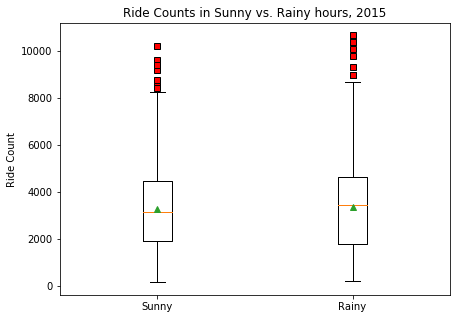

In [5]:
year_2014_df = combined_data_df[combined_data_df['Year']==2014]
year_2015_df = combined_data_df[combined_data_df['Year']==2015]

rain_2015_series = year_2015_df[year_2015_df['rain_1h']>0]['Ride_count']
sunny_2015_series = year_2015_df[year_2015_df['rain_1h']==0]['Ride_count']

data = [sunny_2015_series, rain_2015_series]

labels = ["Sunny", "Rainy"]
# format outliers
red_square = dict(markerfacecolor = 'red', marker='s')

fig, ax = plt.subplots(1,1,figsize=(7,5))

# plot box and whisker plot for each drug on single plot
ax.boxplot(data, labels=labels, flierprops=red_square, showmeans=True)

ax.set_ylabel("Ride Count")

ax.set_title("Ride Counts in Sunny vs. Rainy hours, 2015")

plt.show()

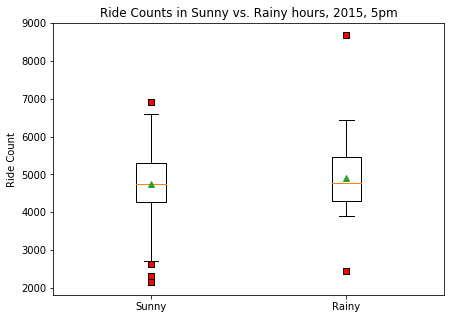

In [9]:
rain_5pm_2015_series = year_2015_df[(year_2015_df['rain_1h']>0) & (year_2015_df['Time'] == 17)]['Ride_count']
sunny_5pm_2015_series = year_2015_df[(year_2015_df['rain_1h']==0) & (year_2015_df['Time'] == 17)]['Ride_count']

data = [sunny_5pm_2015_series, rain_5pm_2015_series]

labels = ["Sunny", "Rainy"]
# format outliers
red_square = dict(markerfacecolor = 'red', marker='s')

fig, ax = plt.subplots(1,1,figsize=(7,5))

# plot box and whisker plot for each drug on single plot
ax.boxplot(data, labels=labels, flierprops=red_square, showmeans=True)

ax.set_ylabel("Ride Count")

ax.set_title("Ride Counts in Sunny vs. Rainy hours, 2015, 5pm")

plt.show()

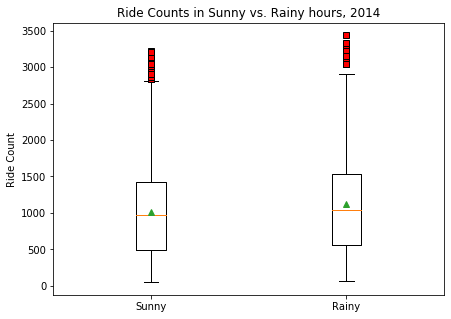

In [6]:
rain_2014_series = year_2014_df[year_2014_df['rain_1h']>0]['Ride_count']

sunny_2014_series = year_2014_df[year_2014_df['rain_1h']==0]['Ride_count']

data = [sunny_2014_series, rain_2014_series]

labels = ["Sunny", "Rainy"]

# format outliers
red_square = dict(markerfacecolor = 'red', marker='s')

fig, ax = plt.subplots(1,1,figsize=(7,5))

# plot box and whisker plot for each drug on single plot
ax.boxplot(data, labels=labels, flierprops=red_square, showmeans=True)

ax.set_ylabel("Ride Count")

ax.set_title("Ride Counts in Sunny vs. Rainy hours, 2014")

plt.show()

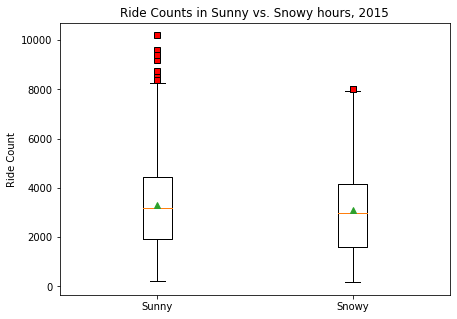

In [11]:
snow_2015_series = year_2015_df[year_2015_df['snow_1h']>0]['Ride_count']
sunny_2015_series = year_2015_df[(year_2015_df['snow_1h']==0) & (year_2015_df['rain_1h']==0)]['Ride_count']

data = [sunny_2015_series, snow_2015_series]

snow_2015_series

labels = ["Sunny", "Snowy"]
# format outliers
red_square = dict(markerfacecolor = 'red', marker='s')

fig, ax = plt.subplots(1,1,figsize=(7,5))

# plot box and whisker plot for each drug on single plot
ax.boxplot(data, labels=labels, flierprops=red_square, showmeans=True)

ax.set_ylabel("Ride Count")

ax.set_title("Ride Counts in Sunny vs. Snowy hours, 2015")

plt.show()

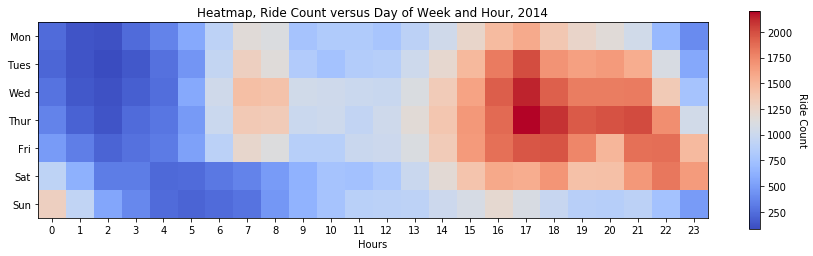

In [71]:
year_2014_df = year_2014_df[['Time', 'Day_of_week', 'Ride_count']]

heatmap_2014_df = year_2014_df.pivot_table(columns='Time', index='Day_of_week', values = 'Ride_count', aggfunc='median')

days_of_week = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

hours = np.arange(0, 24)

fig, ax = plt.subplots(1,1, figsize = (15,4))

im = ax.imshow(heatmap_2014_df, cmap='coolwarm')

ax.set_xticks(np.arange(len(hours)))
ax.set_yticks(np.arange(len(days_of_week)))

ax.set_xticklabels(hours)
ax.set_yticklabels(days_of_week)

cbarlabel = "Ride Count"
cbar = ax.figure.colorbar(mappable = im, ax=ax)
cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

ax.set_title("Heatmap, Ride Count versus Day of Week and Hour, 2014")

ax.set_xlabel('Hours')

plt.show()

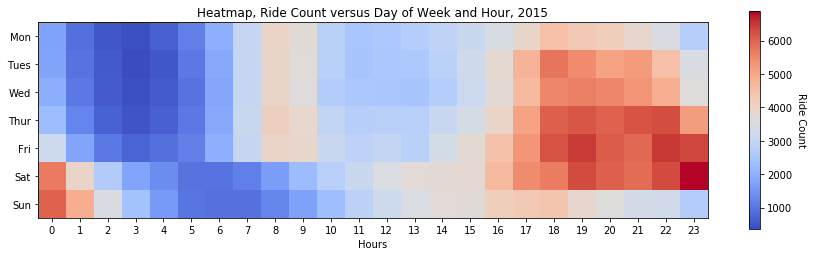

In [72]:
year_2015_df = year_2015_df[['Time', 'Day_of_week', 'Ride_count']]

heatmap_2015_df = year_2015_df.pivot_table(columns='Time', index='Day_of_week', values = 'Ride_count', aggfunc='median')

days_of_week = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

hours = np.arange(0, 24)

fig, ax = plt.subplots(1,1, figsize = (15,4))

im = ax.imshow(heatmap_2015_df, cmap='coolwarm')

ax.set_xticks(np.arange(len(hours)))
ax.set_yticks(np.arange(len(days_of_week)))

ax.set_xticklabels(hours)
ax.set_yticklabels(days_of_week)

cbarlabel = "Ride Count"
cbar = ax.figure.colorbar(mappable = im, ax=ax)
cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

ax.set_title("Heatmap, Ride Count versus Day of Week and Hour, 2015")

ax.set_xlabel('Hours')

plt.show()

In [ ]:
# plt_scat(combined_data_df['temp_max'], combined_data_df['Ride_count'], "Temperature Maximum", "Ride Count", "Ride count versus temp max")
# plt_scat((Monday_df['Time']).astype(int), Monday_df['Ride_count'], "Time of Day", "Ride Count", "Monday Ride count versus Time of Day")
# plt_scat((combined_data_df['Time']).astype(int), combined_data_df['Ride_count'], "Time of Day", "Ride Count", "Total Ride count versus Time of Day")

# plt_scat((Saturday_df['Time']).astype(int), Saturday_df['Ride_count'], "Time of Day", "Ride Count", "Saturday Ride count versus Time of Day")
# sat_night_df  = Saturday_df[(Saturday_df['Time']).astype(int)>=23]

# plt_scat(sat_night_df['temp_max'], sat_night_df['Ride_count'], "Temperature Maximum", "Ride Count", "Saturday Ride count versus Temperature Max \nHours: 23-to-24")
# rain_df = combined_data_df[combined_data_df['rain_3h'] >0]

# plt_scat(rain_df['rain_3h'], rain_df['Ride_count'], "Amount of Rain", "Ride Count", "Ride count versus amount of rain")
# sun_df = combined_data_df[combined_data_df['rain_1h'] == 0]

# sun_df.describe()
# rain_df.describe()
# sat_night_2015_df  = Saturday_2015_df[(Saturday_2015_df['Time']).astype(int)>=20]

# plt_scat(sat_night_2015_df['temp_max'], sat_night_2015_df['Ride_count'], "Temperature Maximum", "Ride Count", "2015 Saturday Ride count versus Temperature Max \nHours: 20-to-24")